<a href="https://colab.research.google.com/github/Zhansaaya/Sessia-9-esep/blob/main/%D0%A1%D0%B5%D1%81%D1%81%D0%B8%D1%8F_9_%D0%B5%D1%81%D0%B5%D0%BF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лучшие параметры: {'rf_model__max_depth': 10, 'rf_model__min_samples_leaf': 4, 'rf_model__n_estimators': 50}
Лучшая точность при кросс-валидации: 0.83
Точность на тестовой выборке: 0.88
              precision    recall  f1-score   support

    Погибшие       0.88      0.93      0.90       105
    Выжившие       0.90      0.81      0.85        74

    accuracy                           0.88       179
   macro avg       0.89      0.87      0.88       179
weighted avg       0.88      0.88      0.88       179



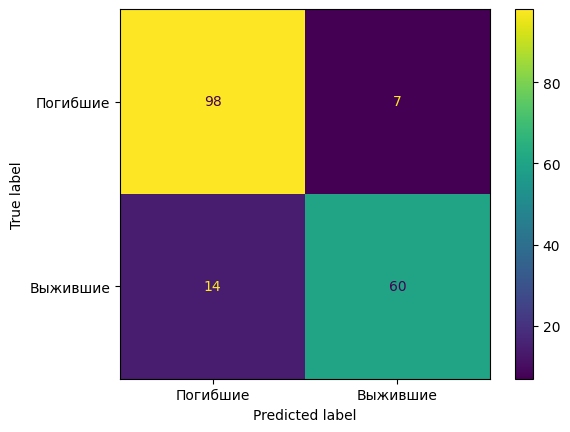

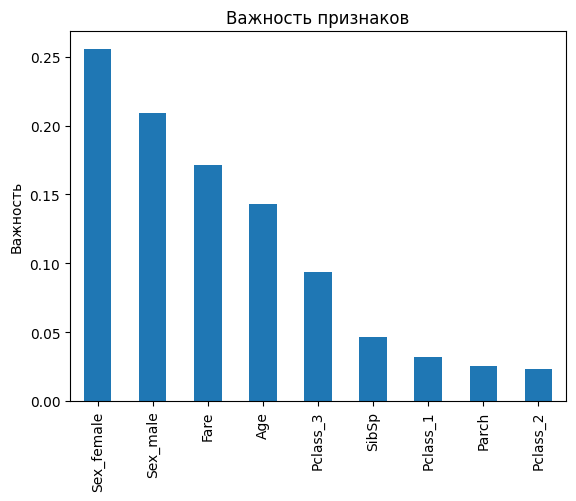

In [7]:
import pandas as pd
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

data_path = '/content/drive/MyDrive/Colab Notebooks/titanic.csv'
data = pd.read_csv(data_path)

features =  data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
target =  data['Survived']
categorical_cols =  ['Sex', 'Pclass']
cat_transformer =  Pipeline(steps=[

    ('missing_filler', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

numeric_cols = ['Age', 'SibSp', 'Parch', 'Fare']
num_transformer = Pipeline(steps=[

    ('median_filler',  SimpleImputer(strategy='median')),
    ('standardizer', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', num_transformer, numeric_cols),
        ('categorical', cat_transformer, categorical_cols)
    ])

full_pipeline = Pipeline([
    ('preprocess', preprocessor),

    ('rf_model', RandomForestClassifier (random_state=0))
])

param_grid = {
    'rf_model__n_estimators':  [50, 100, 200],
    'rf_model__max_depth':  [None, 10, 20, 30],
    'rf_model__min_samples_leaf':  [1, 2, 4]
}

model_search = GridSearchCV(full_pipeline, param_grid, cv=5, scoring='accuracy')
model_search.fit(features, target)

print("Лучшие параметры:",  model_search.best_params_)

print("Лучшая точность при кросс-валидации: {:.2f}".format(model_search.best_score_))

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

best_model =  model_search.best_estimator_
test_predictions =  best_model.predict(X_test)
test_accuracy =  accuracy_score(y_test, test_predictions)

print(f'Точность на тестовой выборке: {test_accuracy:.2f}')

classification_report =  classification_report(y_test, test_predictions, target_names=['Погибшие', 'Выжившие'])
print(classification_report)

conf_matrix =  confusion_matrix(y_test, test_predictions)

conf_disp =  ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Погибшие', 'Выжившие'])
conf_disp.plot()
plt.show()

importances = best_model.named_steps['rf_model'].feature_importances_

encoded_features =  best_model.named_steps['preprocess'].named_transformers_['categorical'].get_feature_names_out()
all_features = list(numeric_cols) + list(encoded_features)

pd.Series(importances, index=all_features).sort_values(ascending=False).plot(kind='bar', title='Важность признаков')
plt.ylabel('Важность')
plt.show()
